<a href="https://colab.research.google.com/github/Sharzla/UniProjects/blob/main/FinalTC3313_A171183.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
heart_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
heart_df['smoking'].replace({0:'Non-smoker', 1: 'Smoker'}, inplace=True)
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,Non-smoker,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,Non-smoker,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,Smoker,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,Non-smoker,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,Non-smoker,8,1


In [ ]:
heart_df['sex'].replace({0:'F', 1: 'M'}, inplace=True)
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,M,Non-smoker,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,M,Non-smoker,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,M,Smoker,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,M,Non-smoker,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,F,Non-smoker,8,1


In [ ]:
heart_df.rename(columns={'creatinine_phosphokinase': 'CPK_level', 'high_blood_pressure': 'hypertension'}, inplace=True)
heart_df.head(2)

,age,anaemia,CPK_level,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,M,Non-smoker,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,M,Non-smoker,6,1


In [ ]:
features_df = heart_df.iloc[:, [1,2,3,4,5]]
features_df.head()

,anaemia,CPK_level,diabetes,ejection_fraction,hypertension
0,0,582,0,20,1
1,0,7861,0,38,0
2,0,146,0,20,0
3,1,111,0,20,0
4,1,160,1,20,0


In [ ]:
target_df = heart_df.iloc[:, 12]
target_df.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [ ]:
Y = pd.DataFrame(target_df)
Y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [ ]:
import matplotlib.pyplot as plt

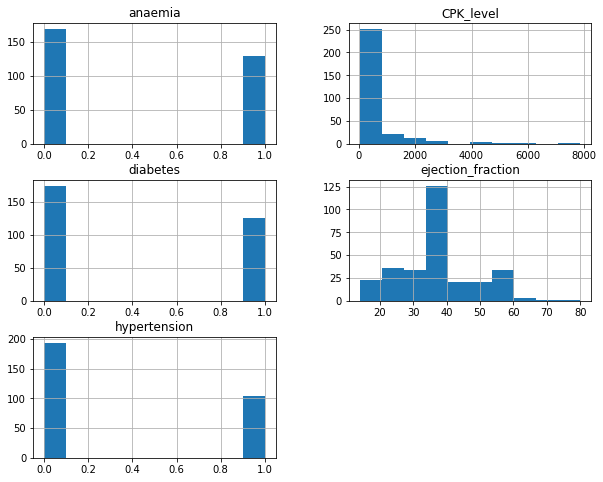

In [ ]:
features_df.hist(figsize=(10, 8))
plt.show()

In [ ]:
features_df = features_df.drop(columns='CPK_level',axis=1)
features_df.head()

,anaemia,diabetes,ejection_fraction,hypertension
0,0,0,20,1
1,0,0,38,0
2,0,0,20,0
3,1,0,20,0
4,1,1,20,0


# Machine Learning model

1. kNN model:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix as plot_confusion
from sklearn.metrics import plot_roc_curve as plot_roc

X_train, X_test, y_train, y_test = train_test_split(features_df, Y, test_size=0.3, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
model_knn = knn.fit(X_train, y_train.values.ravel())

prediction = model_knn.predict(X_test)
prediction_prob = model_knn.predict_proba(X_test)

knn_score = model_knn.score(X_test, y_test.values.ravel())
print('The accuracy of kNN is {:.2f}%'.format(knn_score*100))

The accuracy of kNN is 68.89%


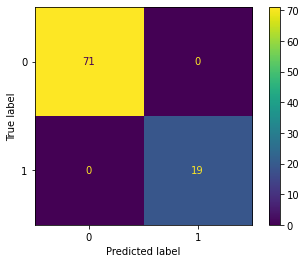

In [ ]:
plot_confusion(model_knn, X_test, prediction)

In [ ]:
scoring = precision_recall_fscore_support(y_test, prediction)
scoring = pd.DataFrame(list(scoring))
scoring.columns = [0, 1]
scoring.index = ['Precision', 'Recall', 'F-Score', 'Support']
np.round(scoring, decimals=2)

print('Evaluation metrics for kNN is:')
scoring

Evaluation metrics for kNN is:


,0,1
Precision,0.676056,0.736842
Recall,0.905660,0.378378
F-Score,0.774194,0.500000
Support,53.000000,37.000000


2. SVM model:

In [ ]:
#training the linear svm
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge',max_iter=1000,random_state=42)

model_svm = svm.fit(X_train,y_train.values.ravel())
svm_predicted = model_svm.predict(X_test)
svm_score= model_svm.score(X_test, y_test.values.ravel())
print('The accuracy of SVM is {:.2f}%'.format(svm_score*100))

The accuracy of SVM is 71.11%


In [ ]:
scoring = precision_recall_fscore_support(y_test, svm_predicted)
scoring = pd.DataFrame(list(scoring))
scoring.columns = [0, 1]
scoring.index = ['Precision', 'Recall', 'F-Score', 'Support']
np.round(scoring, decimals=2)

print('Evaluation metrics for SVM is:')
scoring

Evaluation metrics for SVM is:


,0,1
Precision,0.690141,0.789474
Recall,0.924528,0.405405
F-Score,0.790323,0.535714
Support,53.000000,37.000000


Cross validation:

In [ ]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=10, test_size=.3, random_state=10)
randomcv_knn = []
randomcv_svm = []

for train_index, test_index in rs.split(features_df):
  knn.fit(features_df.loc[train_index], Y.loc[train_index].values.ravel())
  svm.fit(features_df.loc[train_index], Y.loc[train_index].values.ravel())
  randomcv_knn.append(knn.score(features_df.loc[test_index], Y.loc[test_index].values.ravel()))
  randomcv_svm.append(svm.score(features_df.loc[test_index], Y.loc[test_index].values.ravel()))

print('The random sampling cross validation result({} iterations) for kNN is {:.2f}%'.format(rs.get_n_splits(features_df),np.mean(randomcv_knn)*100))
print('The random sampling cross validation result({} iterations) for SVM is {:.2f}%'.format(rs.get_n_splits(features_df),np.mean(randomcv_svm)*100))

The random sampling cross validation result(10 iterations) for kNN is 68.78%
The random sampling cross validation result(10 iterations) for SVM is 65.22%


# Visualisation:

In [ ]:
died = heart_df['DEATH_EVENT'] == 1
died_df = heart_df[died]
died_df.head()

,age,anaemia,CPK_level,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,M,Non-smoker,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,M,Non-smoker,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,M,Smoker,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,M,Non-smoker,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,F,Non-smoker,8,1


In [ ]:
sd = died_df.groupby('smoking').sum()
sd.head()

,age,anaemia,CPK_level,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
smoking,,,,,,,,,,,
Non-smoker,4235.667,34,48978,28,2268,25,16331864.24,124.18,8938,4974,66
Smoker,2025.000,12,15361,12,945,14,8280716.06,52.06,4058,1831,30


In [ ]:
gd = died_df.groupby('sex').sum()
gd.head()

,age,anaemia,CPK_level,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
sex,,,,,,,,,,,
F,2114.000,20,17261,20,1276,17,8823432.12,66.16,4606,2515,34
M,4146.667,26,47078,20,1937,22,15789148.18,110.08,8390,4290,62


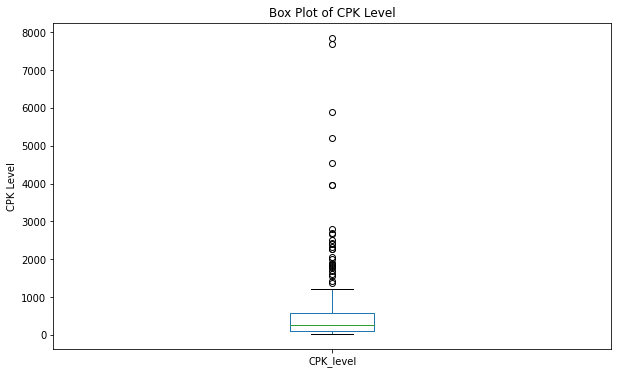

In [ ]:
heart_df['CPK_level'].plot(kind='box', figsize=(10,6))
plt.title('Box Plot of CPK Level')
plt.ylabel('CPK Level')

plt.show()

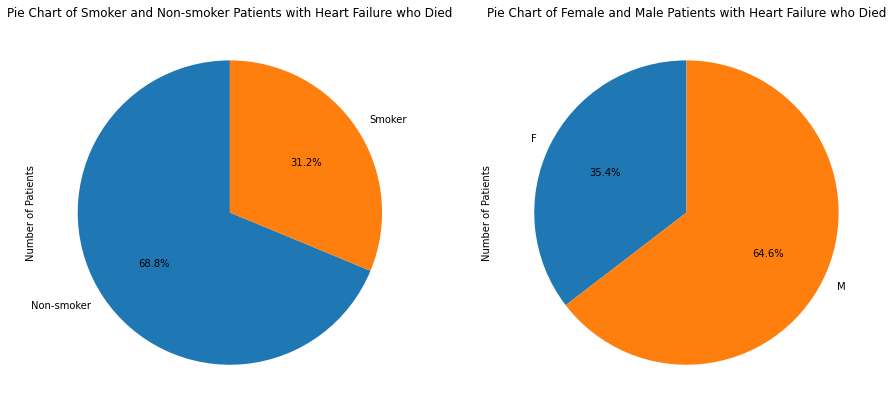

In [ ]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# Subplot 1: Pie Chart
sd['DEATH_EVENT'].plot(kind='pie', figsize=(15, 8), autopct='%1.1f%%', startangle=90,  ax=ax0)
ax0.set_title('Pie Chart of Smoker and Non-smoker Patients with Heart Failure who Died')
ax0.set_ylabel('Number of Patients')

# Subplot 2: Histogram Plot
gd['DEATH_EVENT'].plot(kind='pie', figsize=(15, 8), autopct='%1.1f%%', startangle=90,  ax=ax1)
ax1.set_title('Pie Chart of Female and Male Patients with Heart Failure who Died')
ax1.set_ylabel('Number of Patients')

plt.show()

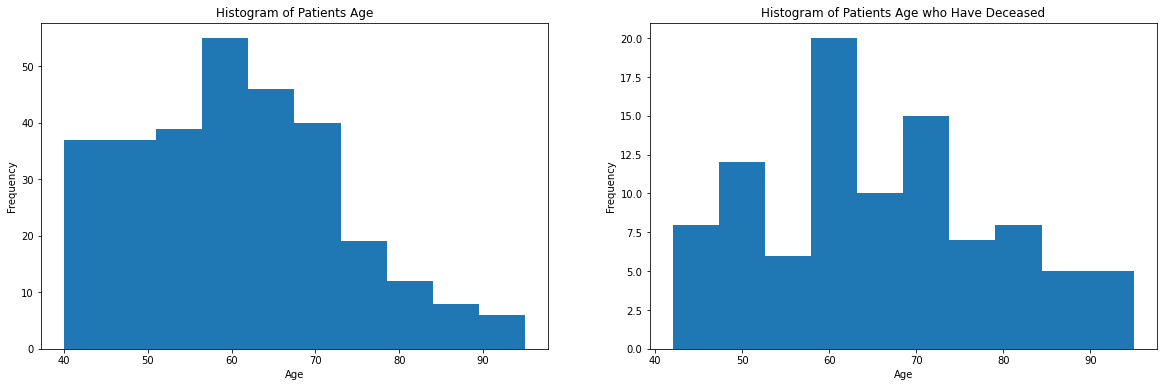

In [ ]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# Subplot 1: Pie Chart
heart_df['age'].plot(kind='hist', figsize=(20, 6), ax=ax0)
ax0.set_title ('Histogram of Patients Age')
ax0.set_ylabel('Frequency')
ax0.set_xlabel('Age')

# Subplot 2: Histogram Plot
died_df['age'].plot(kind='hist', figsize=(20, 6), ax=ax1)
ax1.set_title ('Histogram of Patients Age who Have Deceased')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Age')

plt.show()

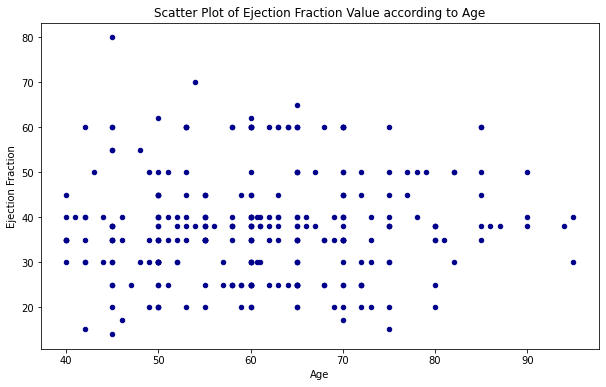

In [ ]:
heart_df.plot(kind='scatter', x='age', y='ejection_fraction', figsize=(10, 6), color='darkblue')
plt.title('Scatter Plot of Ejection Fraction Value according to Age')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.show()

In [ ]:
heart_df.to_csv('cleaned_healthrecord.csv', index=False)